# Advanced analysis

In [1]:
import scyan

Global seed set to 0


## Hierarchical population display
For some projects, you may try to annotate many dozens of different populations. It becomes difficult for the human eye to differentiate so many colors on a UMAP. For this reason, you can create multi-level population names (each level going further into the details of the populations), and display only populations at a certain level or go through subpopulations of one specific group of cells.

### Example
To demonstrate what we call "hierarchical population display", we consider the following two-level multi-index dataframe for the AML dataset.

In [2]:
adata, marker_pop_matrix = scyan.data.load("aml", table="groups_demo")
marker_pop_matrix

,,CD19,CD4,CD8,CD34,CD20,CD45,CD123,CD11c,CD7,CD16,CD38,CD3,HLA-DR,CD64
Populations,level,,,,,,,,,,,,,,
Basophils,Basophils,-1,NaN,-1.0,-1,-1.0,NaN,1,-1,-1.0,-1.0,NaN,-1,-1.0,-1.0
CD4 T cells,CD4 T cells,-1,1.0,-1.0,-1,-1.0,NaN,-1,-1,NaN,-1.0,NaN,1,-1.0,-1.0
CD8 T cells,CD8 T cells,-1,-1.0,1.0,-1,-1.0,NaN,-1,-1,1.0,-1.0,NaN,1,-1.0,-1.0
CD16- NK cells,NK cells,-1,NaN,NaN,-1,-1.0,NaN,-1,-1,1.0,-1.0,NaN,-1,-1.0,-1.0
CD16+ NK cells,NK cells,-1,NaN,NaN,-1,NaN,NaN,-1,-1,1.0,1.0,NaN,-1,-1.0,-1.0
CD34+CD38+CD123- HSPCs,HSPCs,-1,NaN,-1.0,1,-1.0,-1.0,-1,-1,-1.0,-1.0,1.0,-1,NaN,-1.0
CD34+CD38+CD123+ HSPCs,HSPCs,-1,NaN,-1.0,1,-1.0,-1.0,1,-1,-1.0,-1.0,1.0,-1,NaN,-1.0
CD34+CD38lo HSCs,HSCs,-1,NaN,-1.0,1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1.0,-1,NaN,-1.0
Mature B cells,B cells,1,NaN,-1.0,-1,NaN,NaN,-1,-1,-1.0,-1.0,-1.0,-1,NaN,NaN


And we initialize the Scyan model.

In [3]:
# You can modify 'alpha_batch_effect' to improve the batch effect correction
model = scyan.Scyan(adata, marker_pop_matrix, batch_key="subject", temperature=0.5)

INFO:scyan.model:Initialized Scyan model with N=104184 cells, P=14 populations and M=14 markers. Covariates: subject


The following graph shows the hierarchy of populations, leaves being the smallest detail of populations. In practice, Scyan will annotate "leaves populations", but we can use the tree structure to plot annotations of the "large populations" (i.e. the first level of this tree); see below.

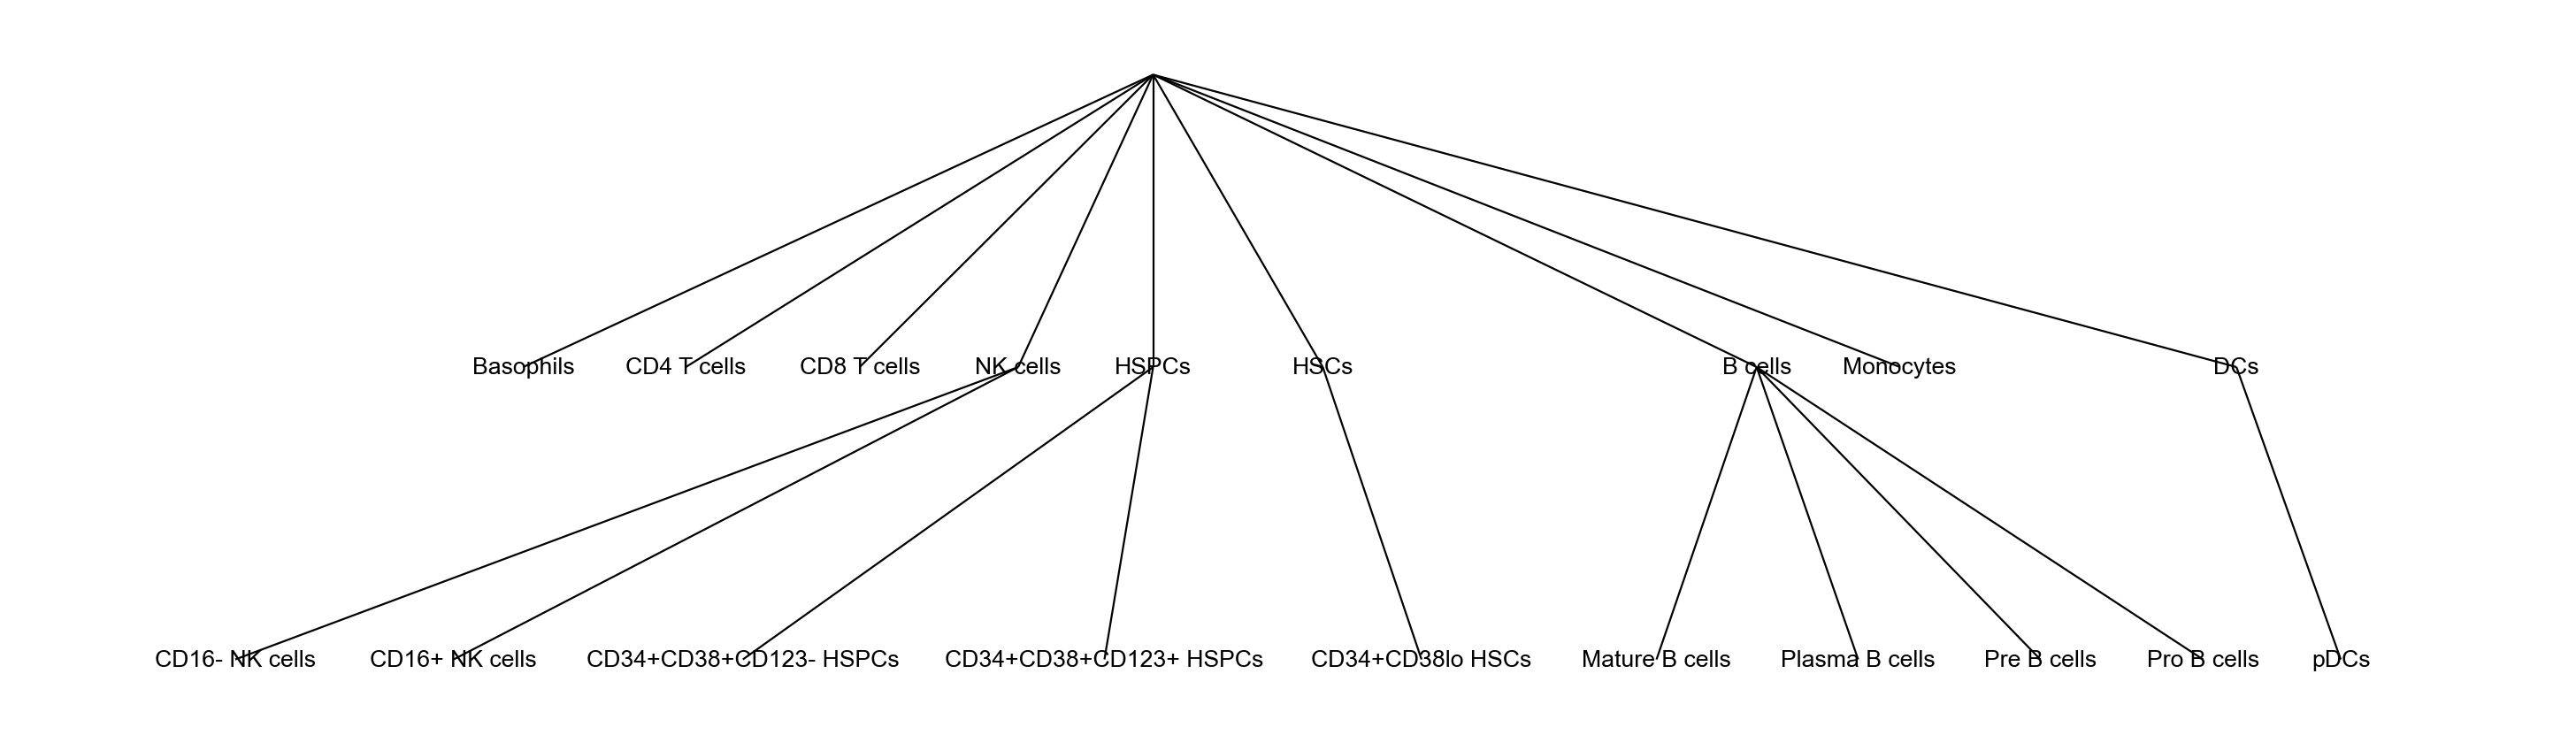

In [4]:
scyan.plot.pops_hierarchy(model)

### How to create a population hierarchy in your table
To create a hierarchical classification of your populations, add (to your knowledge table) one or multiple columns whose names start with `level` (e.g., `level1`, `level_main_population`, or just `level`). We recommend writing these columns after the first column.
The easiest way to create these columns is to manually add them to your knowledge table's `csv` file; see an example [here](https://github.com/MICS-Lab/scyan_data/blob/main/data/aml/groups_demo.csv).

> NB: the first column corresponds to the most detailed population names (i.e. leaves on the tree above), and it contains the population names that Scyan will use for its annotation. The name of this first column should **not** start with `level`, contrary to the columns used to make the population hierarchy.

You don't need any other formatting because `scyan` will detect the levels using their names and return a multi-index dataframe as displayed above.

### Plot the different population levels on a UMAP

First, train your model.

In [ ]:
# You can modify 'alpha_batch_effect' to improve the batch effect correction
model = scyan.Scyan(adata, marker_pop_matrix, batch_key="subject", temperature=0.5)

# If needed, you can also increase the 'patience'
model.fit()
model.predict();

Now, you can use the key associated with a specific level to display all populations at this level.

E.g., if you want to display the level called `level2`, use `color="scyan_pop_level2"`.

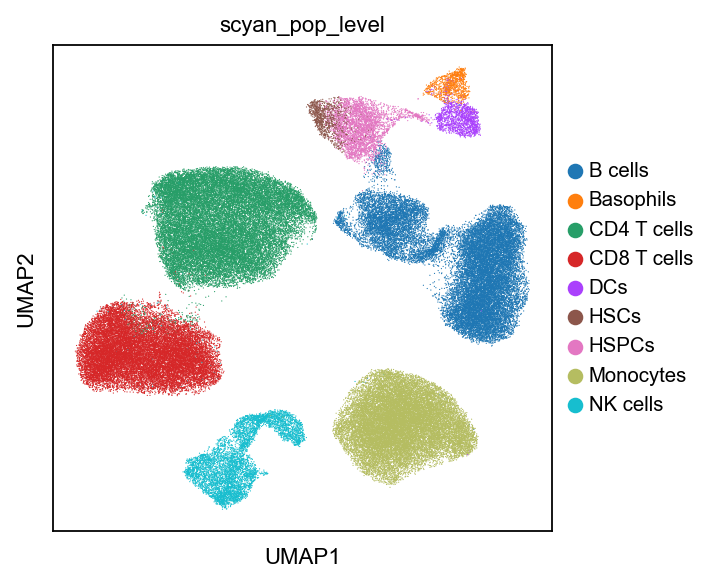

In [4]:
scyan.plot.umap(adata, color="scyan_pop_level") # Plot all main/large populations

You can also use [`scyan.plot.pop_level`](../../api/plots/#scyan.plot.pop_level) to display subpopulations from one group at this level. By default, it uses `level='level'`, but you can change it.

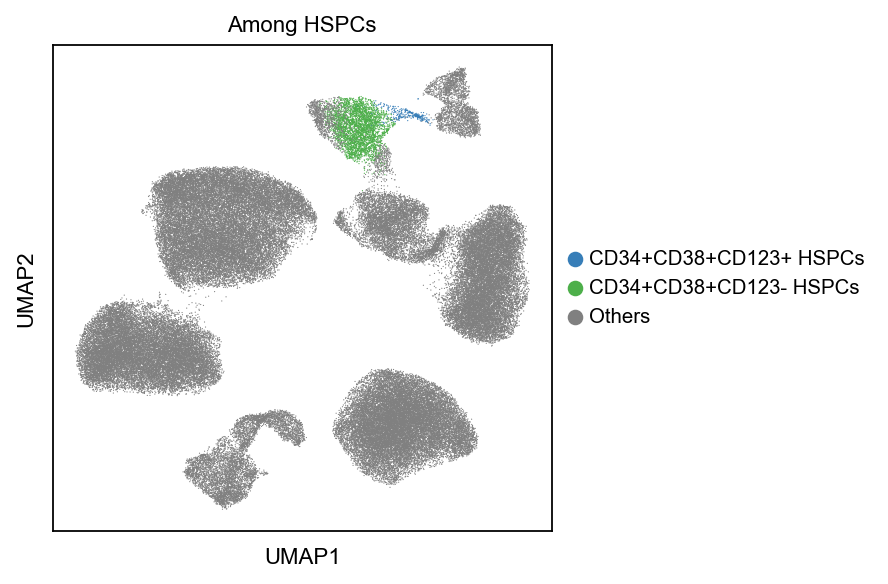

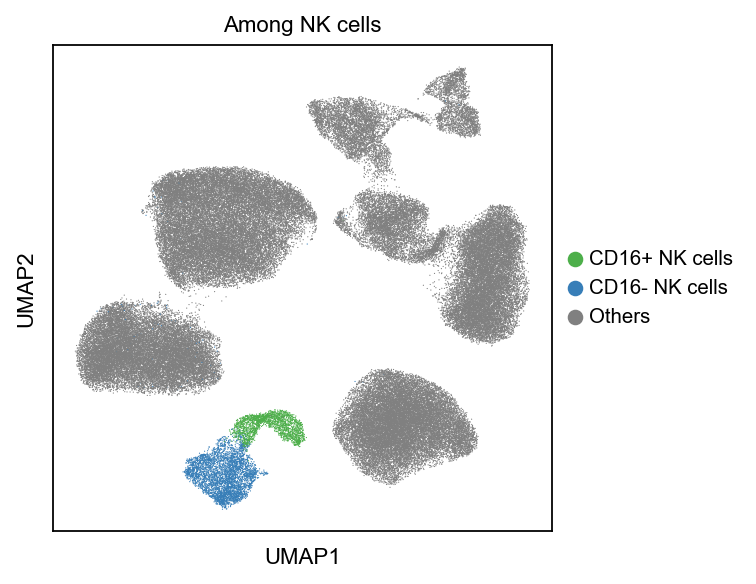

In [5]:
scyan.plot.pop_level(model, "HSPCs") # Plot all populations that belongs to the group "B cells"
scyan.plot.pop_level(model, "NK cells") # Plot all populations that belongs to the group "NK cells"

## Results analysis (MMI, population percentage per patient,...)

You probably have an observation that corresponds to your sample/patient ID. For this public dataset, this observation is `adata.obs["subject"]`.
We can use it to count (or get the proportion) of populations per patient (for more details, see [`scyan.tools.count_cell_populations`](../../api/analysis/#scyan.tools.count_cell_populations)):

In [6]:
scyan.tools.count_cell_populations(adata, "subject", normalize=True) # Remove 'normalize' to get absolute counts

,Basophils,CD16+ NK cells,CD16- NK cells,CD34+CD38+CD123+ HSPCs,CD34+CD38+CD123- HSPCs,CD34+CD38lo HSCs,CD4 T cells,CD8 T cells,Mature B cells,Monocytes,Plasma B cells,Pre B cells,Pro B cells,pDCs
subject,,,,,,,,,,,,,,
H1,0.010254,0.022770,0.038378,0.002415,0.029643,0.009136,0.254005,0.177911,0.161765,0.222210,0.002608,0.055559,0.001380,0.011965
H2,0.007944,0.013745,0.042464,0.004256,0.040289,0.008196,0.260269,0.216639,0.128022,0.157183,0.002995,0.092652,0.006494,0.018852


You can also compute the Mean Metal Intensity (MMI) or Mean Fluorescence Intensity (MFI) per population.

In [7]:
scyan.tools.mean_intensities(adata)

,CD45RA,CD133,CD19,CD22,CD11b,CD4,CD8,CD34,Flt3,CD20,...,CD44,CD38,CD13,CD3,CD61,CD117,CD49d,HLA-DR,CD64,CD41
scyan_pop,,,,,,,,,,,,,,,,,,,,,
Basophils,-0.650394,-0.268267,-0.552603,-0.457793,0.396196,-0.548937,-0.531312,-0.168299,0.074983,-0.414086,...,-0.284314,1.406207,0.637722,-0.891677,0.265756,-0.300440,-0.173134,-0.741070,-0.457706,0.262590
CD16+ NK cells,0.429159,0.039623,-0.504274,-0.399736,-0.044361,-0.535947,-0.046856,-0.242640,-0.014037,-0.375131,...,-1.507957,0.466374,-0.472155,-0.886889,-0.226285,-0.362133,-0.089616,-0.805124,-0.466676,-0.236655
CD16- NK cells,0.617091,-0.036940,-0.516867,-0.423595,-0.073872,-0.555595,-0.225319,-0.275629,-0.057550,-0.389450,...,-1.070441,0.089779,-0.488968,-0.867317,-0.293461,-0.332809,-0.296473,-0.810709,-0.482301,-0.297818
CD34+CD38+CD123+ HSPCs,-0.351304,0.012413,-0.559001,-0.373805,-0.507419,-0.580643,-0.519913,3.186023,0.275922,-0.417951,...,0.225342,1.671787,0.289864,-0.914969,-0.278578,0.463557,0.585703,1.646557,-0.451720,0.098062
CD34+CD38+CD123- HSPCs,-0.609862,0.214337,-0.485652,-0.414402,-0.532063,-0.614568,-0.514752,3.890719,-0.059665,-0.416212,...,-0.311456,1.469275,0.955971,-0.890441,-0.174836,2.778629,0.445701,0.923888,-0.445091,-0.000402
CD34+CD38lo HSCs,-0.731283,0.572578,-0.524156,-0.421885,-0.534525,-0.544957,-0.494022,4.554795,-0.144784,-0.398635,...,-0.342297,-0.206957,0.433710,-0.876245,-0.218498,2.818573,0.079687,0.371171,-0.452750,-0.100354
CD4 T cells,-0.295373,-0.141642,-0.524427,-0.440280,-0.510504,1.329324,-0.427116,-0.276332,-0.035129,-0.402095,...,0.093543,-0.542321,-0.321435,1.133218,-0.081243,0.140566,-0.358566,-0.819418,-0.491286,-0.324514
CD8 T cells,0.079129,0.111491,-0.476057,-0.381079,-0.448947,-0.489495,1.933592,-0.219517,0.052118,-0.276953,...,-0.039015,-0.678655,-0.364914,1.033786,-0.108180,0.092483,-0.319089,-0.812974,-0.500470,-0.321964
Mature B cells,0.911623,0.211303,1.864359,1.998897,-0.347785,-0.538452,-0.487599,-0.010168,0.048773,1.667092,...,0.128547,-0.377311,-0.434820,-0.873354,-0.161541,-0.334423,0.357441,1.126832,-0.367159,0.124034


And also group per patient first (for more details, see [`scyan.tools.mean_intensities`](../../api/analysis/#scyan.tools.mean_intensities)), and compute the MMI on raw intensities.

In [8]:
adata.layers["raw"] = adata.raw.X # Save raw intensities as a new layer
scyan.tools.mean_intensities(adata, groupby=["subject", "scyan_pop"], layer="raw") # Group by subject and scyan populations predictions

CD45RA     CD133       CD19       CD22  \
subject scyan_pop                                                           
H1      Basophils                1.986409  0.493086   0.376089   0.395282   
        CD16+ NK cells           5.608107  0.975891   0.679313   0.731768   
        CD16- NK cells           6.295384  1.008622   0.683303   0.698879   
        CD34+CD38+CD123+ HSPCs   2.856423  1.050163   0.436065   0.966892   
        CD34+CD38+CD123- HSPCs   2.272032  1.331688   0.713006   0.665518   
        CD34+CD38lo HSCs         1.486565  1.668337   0.520531   0.578797   
        CD4 T cells              3.071119  0.786612   0.615706   0.584064   
        CD8 T cells              4.150362  1.332659   0.976140   0.988981   
        Mature B cells           8.798115  1.351135  27.155048  23.170298   
        Monocytes                2.944548  0.830465   0.693846   0.816555   
        Plasma B cells           5.667675  1.182915  19.659534   2.242643   
        Pre B cells              5.170161  0.951324  17.165524   6.232593   
        Pro B cells              2.424829  0.659077  12.980411   2.026644   
        pDCs                     3.191569  0.671008   0.508593   0.639993   
H2      Basophils                0.915726  0.042205   0.101274   0.118964   
        CD16+ NK cells          14.340820  0.135194   0.068921   0.024861   
        CD16- NK cells          14.820559  0.060240   0.085353   0.018483   
        CD34+CD38+CD123+ HSPCs   2.958258  0.381977   0.065748   0.358542   
        CD34+CD38+CD123- HSPCs   1.605877  0.593989   0.554679   0.311576   
        CD34+CD38lo HSCs         1.070537  1.230387   0.263850   0.266859   
        CD4 T cells              3.860143  0.030285   0.082768   0.000332   
        CD8 T cells              7.151220  0.104419   0.165572   0.063777   
        Mature B cells          16.538395  0.141821  27.822359  31.231659   
        Monocytes                1.876170  0.083837   0.218579   0.314857   
        Plasma B cells           6.861670  0.175923  20.177567   0.437430   
        Pre B cells              6.057568  0.099472  22.813587   3.415911   
        Pro B cells              1.884224  0.115019  15.290461   1.573644   
        pDCs                     6.061659  0.085638   0.077789   0.299907   

                                    CD11b       CD4        CD8        CD34  \
subject scyan_pop                                                            
H1      Basophils                7.275185  0.570578   0.249206    1.139696   
        CD16+ NK cells           4.026606  0.680343   4.386758    1.064434   
        CD16- NK cells           3.867708  0.848318   2.777549    1.049212   
        CD34+CD38+CD123+ HSPCs   1.321587  0.506231   0.346509   38.997448   
        CD34+CD38+CD123- HSPCs   1.100386  0.394143   0.352711   56.912209   
        CD34+CD38lo HSCs         0.995732  0.602956   0.444121   83.757065   
        CD4 T cells              1.247325  6.938006   1.066971    0.983536   
        CD8 T cells              1.717226  0.957600  39.204407    1.295235   
        Mature B cells           2.158309  0.727070   0.605473    2.219918   
        Monocytes               30.937788  1.402935   0.491311    1.130986   
        Plasma B cells           1.639651  0.692706   0.501011    1.748886   
        Pre B cells              1.332613  0.496028   0.409444    1.724375   
        Pro B cells              1.293596  0.292935   0.255259   36.326374   
        pDCs                     1.458513  1.645702   0.326985    1.864746   
H2      Basophils               14.215103  0.357817   0.157507    1.310967   
        CD16+ NK cells           4.115219  0.071949   2.346740    0.283892   
        CD16- NK cells           4.126052  0.113824   2.746734    0.238002   
        CD34+CD38+CD123+ HSPCs   0.525630  0.297799   0.215447   35.837738   
        CD34+CD38+CD123- HSPCs   0.362456  0.192000   0.259792   66.735847   
        CD34+CD38lo HSCs         0.347950  0.332126   0.409119  110.724960   
        

## Inverse transformations after batch effect removal

Suppose you removed the batch effect, and you stored the new scaled expressions in a layer called `"corrected"`.
Now, you may want to compute MMI of raw intensities after batch effect removal.

As `adata.layers["corrected"]` is transformed and scaled, you have to unscale it and reverse the transformation you performed (i.e., [`scyan.tools.auto_logicle_transform`](../../api/preprocessing/#scyan.tools.auto_logicle_transform) or [`scyan.tools.asinh_transform`](../../api/preprocessing/#scyan.tools.asinh_transform)) to get raw data.

In [9]:
adata.obsm["corrected"] = model.batch_effect_correction().numpy()

DataLoader:   0%|          | 0/7 [00:00<?, ?it/s]

DataLoader:   0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
adata.obsm["raw_corrected"] = scyan.tools.unscale(adata, obsm="corrected", obsm_names=model.var_names)
adata.obsm["raw_corrected"] = scyan.tools.inverse_transform(adata, obsm="raw_corrected")

INFO:scyan.tools.preprocessing:Performing inverse asinh transform


We can now compute MMI of our raw corrected intensities.

In [11]:
scyan.tools.mean_intensities(adata, obsm="raw_corrected", obsm_names=model.var_names)

,CD19,CD4,CD8,CD34,CD20,CD45,CD123,CD11c,CD7,CD16,CD38,CD3,HLA-DR,CD64
scyan_pop,,,,,,,,,,,,,,
Basophils,0.429488,0.510508,0.290463,1.377057,0.550543,235.222748,153.498077,1.862542,0.368591,0.460482,100.557655,1.020929,0.791476,0.616813
CD16+ NK cells,0.672736,0.536981,3.896623,1.051605,0.562235,811.934265,0.644600,1.772125,119.254395,72.335281,41.521133,0.909237,0.727547,0.540172
CD16- NK cells,0.690447,0.604873,2.679280,1.025616,0.692418,790.716797,0.731300,1.434953,331.414093,2.000364,30.472807,1.913716,0.771144,0.535874
CD34+CD38+CD123+ HSPCs,0.457046,0.390945,0.410860,36.347572,0.686906,100.853767,156.172195,1.668221,0.712719,0.621967,115.002029,0.753280,195.923553,0.685287
CD34+CD38+CD123- HSPCs,0.788179,0.348048,0.317661,57.771240,0.611960,88.048599,3.743180,1.694117,0.558762,0.586755,88.506897,1.029860,82.074982,0.690035
CD34+CD38lo HSCs,0.598596,0.529740,0.418615,87.073868,0.590343,147.053238,3.276937,1.322454,0.390848,0.575877,7.691396,1.143528,26.142094,0.637662
CD4 T cells,0.593423,7.524443,0.865098,0.954125,0.619869,858.966309,0.624171,0.914578,19.241194,0.465529,6.425010,349.316284,0.597908,0.488431
CD8 T cells,0.913638,0.701833,37.664074,1.237075,1.025258,947.754700,0.628787,0.752963,26.448017,0.554922,3.316784,284.936523,0.716348,0.420792
Mature B cells,26.167215,0.607499,0.478030,2.039176,30.309443,700.662048,0.969035,1.459214,0.259585,0.536168,6.935181,1.194092,101.247513,1.175673
